In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


In [2]:
df=pd.read_excel(r"C:\Users\MY BOOK\OneDrive\Documents\Data analytics\padhai\ameo 2015.xlsx")

In [3]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# Data Preprocessing

In [5]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

The data set has no missing values

In [6]:
# In order to do the analysis on a homogeneous data, we subset the dataframe based on Date of birth and Date of joining.
# DOB equal to 1991/1992/1993 and DOJ equal to 2014/2015 ensure that the candidates considered do not differ 
# much on age and seniority. 

In [7]:
df['DOB'].dt.year.unique()

array([1990, 1989, 1992, 1991, 1993, 1987, 1988, 1986, 1994, 1977, 1985,
       1995, 1997, 1983, 1984, 1981, 1982], dtype=int64)

In [8]:
# Restricting DOB equal to 1991/1992/1993

df=df[(df['DOB'].dt.year==1991)|(df['DOB'].dt.year==1992)|(df['DOB'].dt.year==1993)]

In [9]:
df['DOJ'].dt.year.unique()

array([2014, 2013, 2012, 2010, 2015, 2011, 1991], dtype=int64)

In [10]:
# Restricting DOJ equal to 2014/2015

df=df[(df['DOJ'].dt.year==2014)|(df['DOB'].dt.year==2015)]

In [11]:
# Converting 'College GPA' values to the 100 point scale
df.loc[df['collegeGPA']<10,'collegeGPA']=df.loc[df['collegeGPA']<10,'collegeGPA']*10

In [12]:
df['GraduationYear'].value_counts()

2014    783
2013    428
2012     29
2015     13
2016      4
2017      3
0         1
Name: GraduationYear, dtype: int64

In [13]:
# Restricting graduation year to 2013/2014,2015

df=df[(df['GraduationYear']==2013)|(df['GraduationYear']==2014)|(df['GraduationYear']==2015)]

In [14]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [15]:
# Dropping columns not usefull for moodel development

df=df.drop(['ID','DOL', 'DOJ','JobCity', 'Designation','DOB',  'CollegeID', 'CollegeCityID','CollegeState', 'GraduationYear', 
'12graduation', 'Specialization','extraversion','CollegeCityTier'], axis=1)

In [16]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [17]:
df

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,English,...,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,nueroticism,openess_to_experience
2,325000,f,85.00,cbse,68.20,cbse,2,B.Tech/B.E.,70.00,615,...,-1,-1,-1,-1,-1,-1,0.2718,1.7109,-0.8682,0.6721
5,300000,m,89.92,state board,87.00,state board,2,B.Tech/B.E.,76.32,560,...,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-0.7415,-0.8608
6,300000,m,86.08,state board,67.50,state board,2,B.Tech/B.E.,72.98,590,...,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-2.0092,-1.0872
9,230000,m,77.00,cbse,72.20,cbse,2,B.Tech/B.E.,78.00,605,...,324,-1,-1,-1,-1,-1,-1.3080,0.5454,0.9066,0.0973
16,325000,m,85.80,cbse,74.80,cbse,2,B.Tech/B.E.,64.80,685,...,-1,-1,-1,-1,-1,-1,1.1336,1.0449,-0.6147,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,310000,m,82.80,state board,89.20,state board,2,B.Tech/B.E.,75.00,405,...,420,-1,-1,-1,-1,-1,-0.3027,-0.1206,-0.3612,-0.2859
3975,300000,m,86.00,cbse,76.00,cbse,2,B.Tech/B.E.,63.00,720,...,-1,-1,-1,-1,-1,-1,0.5591,0.5454,0.3995,0.4805
3981,220000,m,53.40,cbse,65.40,cbse,2,B.Tech/B.E.,71.20,560,...,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-1.1218,1.4386
3989,300000,m,74.88,state board,82.55,state board,2,B.Tech/B.E.,80.00,500,...,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.0333,0.6721


In [18]:
# Checking for missing values for the columns 'English','Logical' and 'Quant' which may be represented by -1

df[(df[['English','Logical','Quant']]==-1).any(axis=1)] 

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,English,...,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,nueroticism,openess_to_experience


In [19]:
# Checking for missing values for the column 'Domain' which may be represented by -1

df[df['Domain']==-1]

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,English,...,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,nueroticism,openess_to_experience
5,300000,m,89.92,state board,87.00,state board,2,B.Tech/B.E.,76.32,560,...,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-0.7415,-0.8608
16,325000,m,85.80,cbse,74.80,cbse,2,B.Tech/B.E.,64.80,685,...,-1,-1,-1,-1,-1,-1,1.1336,1.0449,-0.6147,-0.8608
73,240000,m,75.00,cbse,64.00,cbse,2,B.Tech/B.E.,67.00,510,...,-1,-1,-1,-1,-1,-1,-0.1590,0.8784,0.2727,-0.6692
83,145000,m,80.00,state board,70.00,state board,2,B.Tech/B.E.,55.00,430,...,-1,-1,-1,-1,-1,-1,0.1282,-0.1206,1.5404,0.0973
91,275000,m,80.80,state board,75.00,state board,2,B.Tech/B.E.,77.38,405,...,-1,500,-1,-1,-1,-1,1.4208,-0.7866,-1.5021,-0.4776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,360000,m,89.90,state board,84.50,state board,2,B.Tech/B.E.,68.00,675,...,-1,-1,-1,-1,-1,-1,1.2772,0.8784,-0.7415,0.4805
3715,350000,m,85.76,state board,90.83,state board,2,B.Tech/B.E.,84.00,630,...,-1,-1,-1,-1,-1,-1,1.5644,0.0459,-1.3753,0.2889
3854,85000,f,72.50,state board,67.00,state board,2,B.Tech/B.E.,75.30,510,...,-1,-1,-1,-1,-1,-1,1.2772,1.5444,-1.1218,0.8637
3900,200000,f,69.00,state board,69.12,state board,1,B.Tech/B.E.,62.00,475,...,-1,315,-1,-1,-1,-1,-0.0154,-0.7866,-0.7415,0.2889


In [20]:
# Dropping rows with issing values

df = df.drop(df[df['Domain']==-1].index)

In [21]:
# Assessing the '10board' column

df['10board'].unique()

array(['cbse', 'state board', 'icse', 'up', 'matriculation', 'bseb',
       'karnataka secondary education examination board', 'ssc',
       'rajasthan board', 'up board', 'board of ssc',
       'ssc board of andrapradesh', 'uttar pradesh board', 'karnataka',
       'board of secondary education, andhra pradesh', 'aisse', 0,
       'board of secondary education,orissa', 'nagpur',
       'state board (jac, ranchi)', 'state board ',
       'board of secondary education', 'maharashtra satate board',
       'state boardmp board ', 'bseb, patna',
       'jharkhand acedemic council'], dtype=object)

In [22]:
# Correcting the '10board column'

cbse=['cbse','cbse[gulf zone]','central board of secondary education','central board of secondary education, new delhi','cbse board']
icse=['icse','icse board', 'icse board , new delhi']
isc=['council for indian school certificate examination','isc']
def boardcorrect10(x):
    if x in cbse:
        return 'cbse'
    elif x in icse:
        return 'icse'
    elif x in isc:
        return 'isc'
    else:
        return 'state'
    
df['10board']=df['10board'].apply(boardcorrect10)

In [23]:
# Assessing the '12board' column

df['12board'].unique()

array(['cbse', 'state board', 'icse', ' upboard', 0, 'bseb',
       'department of pre-university eduction', ' board of intermediate',
       'isc', 'rajasthan board',
       'intermediate board of education,andhra pradesh', 'up board',
       'board of intermediate',
       'board of intermediate education,andra pradesh',
       'uttar pradesh board', 'karnataka sslc',
       'board of intermediate education, andhra pradesh', 'aissce',
       'bte up', 'nios', 'bie', 'nagpur', 'state board (jac, ranchi)',
       'state board ', 'board of intermediate(bie)', 'matriculation',
       'maharashtra satate board', 'board of intermediate education, ap',
       'board of secondary education rajasthan',
       'board of intermediate education', 'madhya pradesh open school',
       'biec, patna', 'jharkhand acedemic council'], dtype=object)

In [24]:
# Correcting the '12board column'

cbse=['cbse','cbsc','cbese','cbse[gulf zone]','cbse,new delhi','central board of secondary education','central board of secondary education, new delhi','cbse board']
icse=['icse','icse board', 'icse board , new delhi']
isc=['council for indian school certificate examination','isc','isce','isc board']
def boardcorrect12(x):
    if x in cbse:
        return 'cbse 12'
    elif x in icse:
        return 'icse 12'
    elif x in isc:
        return 'isc 12'
    else:
        return 'state 12'
    
df['12board']=df['12board'].apply(boardcorrect12)

In [25]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<AxesSubplot:ylabel='Salary'>

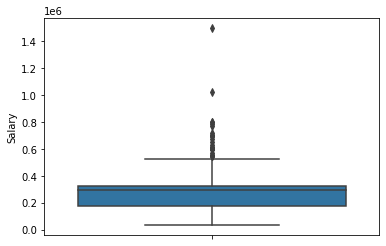

In [26]:
# Checking the 'Salary' column for outliers

sns.boxplot(y='Salary', data=df)

There are many outliers, but, we will proceed without removing them.

In [27]:
#q1=df['Salary'].quantile(0.25)
#q3=df['Salary'].quantile(0.75)
#iqr=q3-q1
#u_bound=q3+1.5*iqr
#df=df[df['Salary']<u_bound]

In [28]:
#sns.boxplot(y='10percentage', data=df)
#REMOVE OUTLER?
#sns.boxplot(y='12percentage', data=df)
#REMOVE OUTLER?

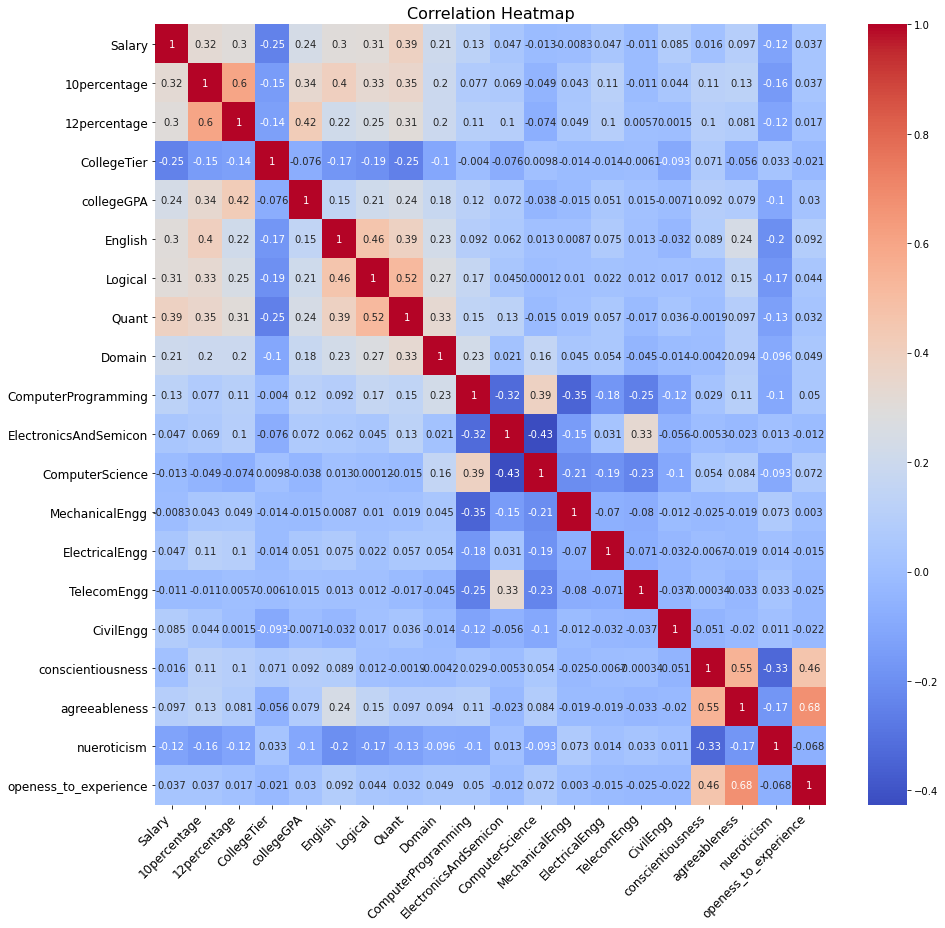

In [29]:
# Checking the Pearson correlation coefficients

plt.figure(figsize=(14,13))
sns.heatmap(df.corr(method='pearson'), cmap='coolwarm', annot=True, annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()


Many of the features are of very low correlation coefficient. Close to zero correlation cefficient implies that there is 
no linear relation between the corresponding variables.

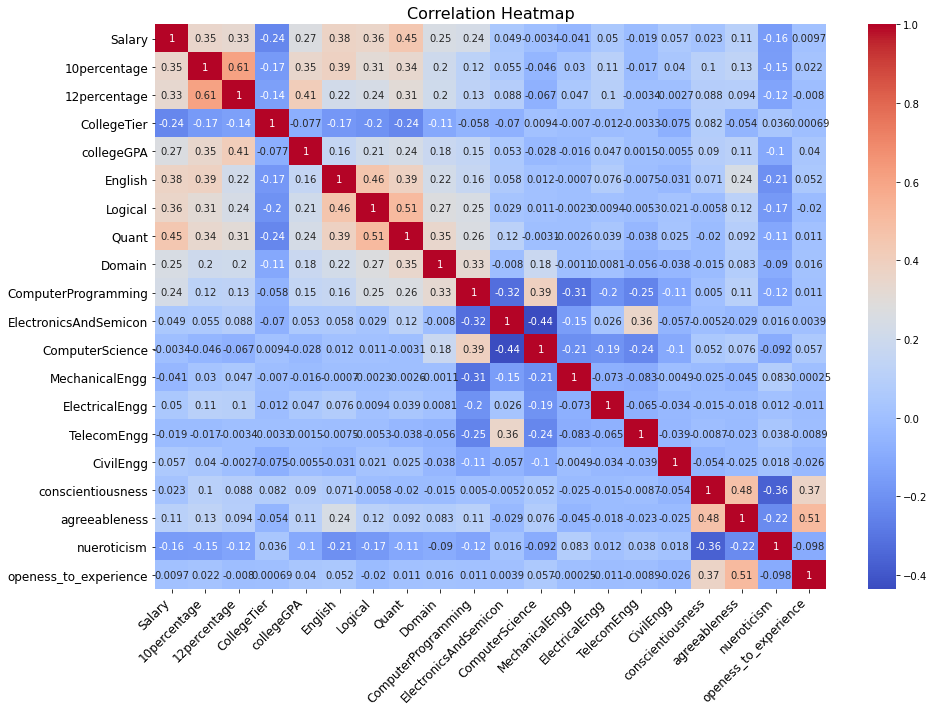

In [30]:
# Checking the Spearman correlation coefficients

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True, annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()

When using the Pearson method, the correlation coefficient indicates a very low correlation.
However, a slightly stronger(still weak) correlation is observed when the Spearman method is used, which indicates a non-linear relationship between the variables.

In [31]:
# Transforming a few columns based on the correlation matrix

df['score']=df['10percentage']+df['12percentage']+df['collegeGPA']+df['10percentage']*df['12percentage']*df['collegeGPA']
df['skills']=df['English']+df['Logical']+df['Quant']+df['English']*df['Logical']*df['Quant']

df=df.drop(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant'], axis=1)

# The features 'conscientiousness', 'agreeableness' and 'openess_to_experience' are positive attributes, 
# whereas 'nueroticism' is a negative attribute. For a technical role, neuroticism is not necessarily always considered
# a negative trait.,  we will not use that column for the model development.

df['positive attributes1']=df['conscientiousness']+df['agreeableness']+df[ 'openess_to_experience']
df['positive attributes2']=(df['conscientiousness']+10)*(df['agreeableness']+10)*(df[ 'openess_to_experience']+10)

df=df.drop(['conscientiousness', 'agreeableness','openess_to_experience','nueroticism'], axis=1)


df['specific']=df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].max(axis=1)#+df['Domain']
df=df.drop(['ElectronicsAndSemicon', 'ComputerScience', 'ComputerProgramming','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'], axis=1)

df=df[df['specific']!=-1]

In [32]:
df

,Salary,Gender,10board,12board,CollegeTier,Degree,Domain,score,skills,positive attributes1,positive attributes2,specific
2,325000,f,cbse,cbse 12,2,B.Tech/B.E.,0.450877,406013.200000,124016280,2.6548,1283.768495,395
6,300000,m,state,state 12,2,B.Tech/B.E.,0.356536,424269.552000,97528405,0.5155,1032.520841,405
9,230000,m,cbse,cbse 12,2,B.Tech/B.E.,0.493596,433860.400000,186296340,-0.6653,925.524746,385
18,120000,m,state,icse 12,2,B.Tech/B.E.,0.563268,293101.820000,118541600,1.6585,1168.324362,425
24,335000,m,state,state 12,2,B.Tech/B.E.,0.356536,602174.000000,218533060,0.5490,1049.859831,475
...,...,...,...,...,...,...,...,...,...,...,...,...
3970,310000,m,state,state 12,2,B.Tech/B.E.,0.881620,554179.000000,79988800,-0.7092,930.644834,705
3975,300000,m,cbse,cbse 12,2,B.Tech/B.E.,0.968237,411993.000000,175267710,1.5850,1167.002974,605
3981,220000,m,cbse,cbse 12,2,B.Tech/B.E.,0.953900,248846.032000,151705625,1.2797,1125.263053,575
3989,300000,m,state,state 12,2,B.Tech/B.E.,0.356536,494744.950000,120001480,0.8462,1085.852925,465


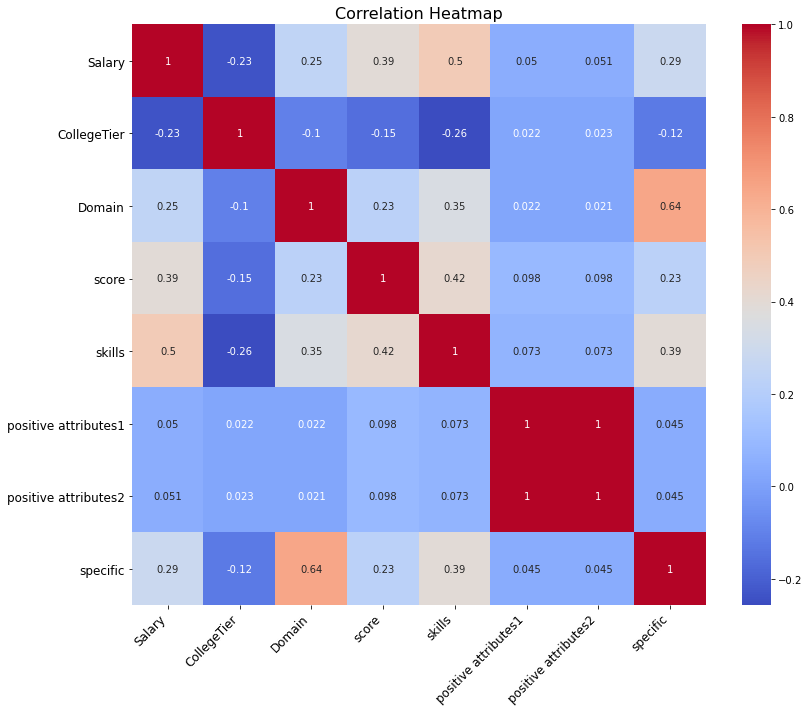

In [33]:
# Checking the spearman correlation after the feature transformation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True, annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()

In [34]:
# Dropping columns with low correlation coefficient

df=df.drop(['positive attributes1','positive attributes2'], axis=1)

In [35]:
# Converting the numeric column of salary to 3 classes

q1=df['Salary'].quantile(0.25)
q2=df['Salary'].quantile(0.5)
q3=df['Salary'].quantile(0.75)

def salgrp(x):
    if x<q2:
        return 'low'
    elif q2<=x<q3:
        return 'medium'
    else:
        return 'high'

df['Salary']=df['Salary'].apply(salgrp)

df

,Salary,Gender,10board,12board,CollegeTier,Degree,Domain,score,skills,specific
2,high,f,cbse,cbse 12,2,B.Tech/B.E.,0.450877,406013.200000,124016280,395
6,medium,m,state,state 12,2,B.Tech/B.E.,0.356536,424269.552000,97528405,405
9,low,m,cbse,cbse 12,2,B.Tech/B.E.,0.493596,433860.400000,186296340,385
18,low,m,state,icse 12,2,B.Tech/B.E.,0.563268,293101.820000,118541600,425
24,high,m,state,state 12,2,B.Tech/B.E.,0.356536,602174.000000,218533060,475
...,...,...,...,...,...,...,...,...,...,...
3970,medium,m,state,state 12,2,B.Tech/B.E.,0.881620,554179.000000,79988800,705
3975,medium,m,cbse,cbse 12,2,B.Tech/B.E.,0.968237,411993.000000,175267710,605
3981,low,m,cbse,cbse 12,2,B.Tech/B.E.,0.953900,248846.032000,151705625,575
3989,medium,m,state,state 12,2,B.Tech/B.E.,0.356536,494744.950000,120001480,465


In [36]:
# Chi-square test to determine whether board of 10th has any effect on the salary earned
# H0: There is no effect
# H1: Salary depends on 10th board



# Creating a contingency table of salary class and 10th board
contingency_table = pd.crosstab(df['Salary'], df['10board'])
contingency_table

10board,cbse,icse,state
Salary,,,
high,173,43,135
low,211,42,304
medium,94,18,105


In [37]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square:", chi2)
print("p-value:", p_value)
print("Chi critical:", stats.chi2.ppf(.95,4))

Chi-square: 23.637733428108447
p-value: 9.440196528722143e-05
Chi critical: 9.487729036781154


 since p-value is less than 0.05, we reject H0
 Thus, 10th board effects the salary class

In [38]:
# Chi-square test to determine whether board of 12th has any effect on the salary earned
# H0: There is no effect
# H1: Salary depends on 12th board


contingency_table = pd.crosstab(df['Salary'], df['12board'])
contingency_table

12board,cbse 12,icse 12,isc 12,state 12
Salary,,,,
high,178,24,2,147
low,207,25,1,324
medium,97,7,2,111


In [39]:
# Since frequency of candidates from isc is too low, we exclude them and proceed with the test

contingency_table = pd.crosstab(df[df['12board']!='isc 12']['Salary'], df[df['12board']!='isc 12']['12board'])
contingency_table

12board,cbse 12,icse 12,state 12
Salary,,,
high,178,24,147
low,207,25,324
medium,97,7,111


In [40]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square:", chi2)
print("p-value:", p_value)
print("Chi critical:", stats.chi2.ppf(.95,4))

Chi-square: 24.538756664333942
p-value: 6.227694078591227e-05
Chi critical: 9.487729036781154


 since p-value is less than 0.05, we reject H0
 Thus, 12th board effects the salary class

In [41]:
# Chi-square test to determine whether Gender has any effect on the salary earned
# H0: There is no effect
# H1: Salary depends on Gender


# Create a contingency table of salary class and Gender
contingency_table = pd.crosstab(df['Salary'], df['Gender'])
contingency_table

Gender,f,m
Salary,,
high,73,278
low,149,408
medium,68,149


In [42]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print("Chi-square:", chi2)
print("p-value:", p_value)
print("Chi critical:",stats.chi2.ppf(0.95,2))

Chi-square: 8.32968440390638
p-value: 0.01553216565214111
Chi critical: 5.991464547107979


 since p-value is less than 0.05, we reject H0
 Thus, Gender effects the salary class

In [43]:
# Chi-square test to determine whether College Tier has any effect on the salary earned
# H0: There is no effect
# H1: Salary depends on College Tier


# Creating a contingency table of salary class and College Tier
contingency_table = pd.crosstab(df['Salary'], df['CollegeTier'])
contingency_table

CollegeTier,1,2
Salary,,
high,60,291
low,10,547
medium,15,202


In [44]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square:", chi2)
print("p-value:", p_value)
print("Chi critical:",stats.chi2.ppf(0.95,2))

Chi-square: 72.30938846677826
p-value: 1.9870820468034277e-16
Chi critical: 5.991464547107979


 since p-value is less than 0.05, we reject H0
 Thus, College Tier effects the salary class

In [45]:
# Selecting features and target

x=df.drop('Salary', axis=1)

y=df['Salary']

In [46]:
x

,Gender,10board,12board,CollegeTier,Degree,Domain,score,skills,specific
2,f,cbse,cbse 12,2,B.Tech/B.E.,0.450877,406013.200000,124016280,395
6,m,state,state 12,2,B.Tech/B.E.,0.356536,424269.552000,97528405,405
9,m,cbse,cbse 12,2,B.Tech/B.E.,0.493596,433860.400000,186296340,385
18,m,state,icse 12,2,B.Tech/B.E.,0.563268,293101.820000,118541600,425
24,m,state,state 12,2,B.Tech/B.E.,0.356536,602174.000000,218533060,475
...,...,...,...,...,...,...,...,...,...
3970,m,state,state 12,2,B.Tech/B.E.,0.881620,554179.000000,79988800,705
3975,m,cbse,cbse 12,2,B.Tech/B.E.,0.968237,411993.000000,175267710,605
3981,m,cbse,cbse 12,2,B.Tech/B.E.,0.953900,248846.032000,151705625,575
3989,m,state,state 12,2,B.Tech/B.E.,0.356536,494744.950000,120001480,465


In [47]:

le=LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])

In [48]:
board10=pd.get_dummies( x['10board'], drop_first=True)
board12=pd.get_dummies( x['12board'], drop_first=True)
degree=pd.get_dummies( x['Degree'], drop_first=True)
x=pd.concat([board10, board12, degree, x.drop(['10board','12board','Degree'], axis=1)], axis=1)


In [49]:
x.columns

Index(['icse', 'state', 'icse 12', 'isc 12', 'state 12', 'M.Tech./M.E.', 'MCA',
       'Gender', 'CollegeTier', 'Domain', 'score', 'skills', 'specific'],
      dtype='object')

In [50]:
x

,icse,state,icse 12,isc 12,state 12,M.Tech./M.E.,MCA,Gender,CollegeTier,Domain,score,skills,specific
2,0,0,0,0,0,0,0,0,2,0.450877,406013.200000,124016280,395
6,0,1,0,0,1,0,0,1,2,0.356536,424269.552000,97528405,405
9,0,0,0,0,0,0,0,1,2,0.493596,433860.400000,186296340,385
18,0,1,1,0,0,0,0,1,2,0.563268,293101.820000,118541600,425
24,0,1,0,0,1,0,0,1,2,0.356536,602174.000000,218533060,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,0,1,0,0,1,0,0,1,2,0.881620,554179.000000,79988800,705
3975,0,0,0,0,0,0,0,1,2,0.968237,411993.000000,175267710,605
3981,0,0,0,0,0,0,0,1,2,0.953900,248846.032000,151705625,575
3989,0,1,0,0,1,0,0,1,2,0.356536,494744.950000,120001480,465


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [52]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)


scaler = MinMaxScaler()
columns_to_scale = ['score', 'skills', 'specific']
train_x[columns_to_scale] = scaler.fit_transform(train_x[columns_to_scale])
test_x[columns_to_scale] = scaler.transform(test_x[columns_to_scale])


for i in [50,100,150,200,250,500,1000,1500]:   
    rf=RandomForestClassifier(criterion="entropy", n_estimators=i,min_samples_split=7, bootstrap=True).fit(train_x, train_y)
    pred=rf.predict(test_x)
    pred2=rf.predict(train_x)
    print('n_estimators ', i)
    print(confusion_matrix(test_y, pred))
    print("Training accuracy ", accuracy_score(train_y, pred2))
    print("Testing accuracy ",accuracy_score(test_y, pred))
    print(classification_report(pred,test_y))
    

n_estimators  50
[[ 66  29   8]
 [ 23 150   7]
 [ 21  31   3]]
Training accuracy  0.9034307496823379
Testing accuracy  0.6479289940828402
              precision    recall  f1-score   support

        high       0.64      0.60      0.62       110
         low       0.83      0.71      0.77       210
      medium       0.05      0.17      0.08        18

    accuracy                           0.65       338
   macro avg       0.51      0.49      0.49       338
weighted avg       0.73      0.65      0.68       338

n_estimators  100
[[ 63  31   9]
 [ 24 148   8]
 [ 20  30   5]]
Training accuracy  0.9123252858958069
Testing accuracy  0.6390532544378699
              precision    recall  f1-score   support

        high       0.61      0.59      0.60       107
         low       0.82      0.71      0.76       209
      medium       0.09      0.23      0.13        22

    accuracy                           0.64       338
   macro avg       0.51      0.51      0.50       338
weighted avg    

Random Forest method produces a model with around 60% accuracy and very low precision for 'medium' class

In [53]:
# We employ Cross Validation to make a better estimate of the accuracy


for i in [50,100,150,200,250,500,1000,1500, 2000]:   
    rf=RandomForestClassifier(criterion="entropy", n_estimators=i,min_samples_split=7, bootstrap=True)
    scores = cross_val_score(rf, x, y, cv=5)
    print( "No. of estimators: ", i)
    print("Cross-validated scores:", scores)
    print("Mean cross-validated score:", scores.mean())

No. of estimators:  50
Cross-validated scores: [0.62666667 0.63111111 0.61777778 0.64444444 0.57777778]
Mean cross-validated score: 0.6195555555555556
No. of estimators:  100
Cross-validated scores: [0.60444444 0.66666667 0.61777778 0.63111111 0.54222222]
Mean cross-validated score: 0.6124444444444445
No. of estimators:  150
Cross-validated scores: [0.60444444 0.64444444 0.62222222 0.64       0.58666667]
Mean cross-validated score: 0.6195555555555556
No. of estimators:  200
Cross-validated scores: [0.61333333 0.64888889 0.62666667 0.64       0.59111111]
Mean cross-validated score: 0.624
No. of estimators:  250
Cross-validated scores: [0.61777778 0.63111111 0.64       0.64888889 0.58666667]
Mean cross-validated score: 0.6248888888888888
No. of estimators:  500
Cross-validated scores: [0.60888889 0.64       0.63111111 0.64       0.58666667]
Mean cross-validated score: 0.6213333333333333
No. of estimators:  1000
Cross-validated scores: [0.60888889 0.64       0.62666667 0.64       0.573333

 From the result of Cross Validation, we can conclude that a Random Forest with n_estimators=1500 gives a model with 62% accuracy 

In [54]:
# Now we determine the performance of a model developed with Gradient boost

for i in [50,100,150,200,250,500]:   
    gb=GradientBoostingClassifier( n_estimators=i).fit(train_x, train_y)
    pred=gb.predict(test_x)
    pred2=gb.predict(train_x)
    print('n_estimators ', i)
    print(accuracy_score(train_y, pred2))
    print(accuracy_score(test_y, pred))
    print(confusion_matrix(test_y, pred))
    print(classification_report(pred,test_y))

n_estimators  50
0.7229987293519695
0.6094674556213018
[[ 59  29  15]
 [ 25 145  10]
 [ 23  30   2]]
              precision    recall  f1-score   support

        high       0.57      0.55      0.56       107
         low       0.81      0.71      0.76       204
      medium       0.04      0.07      0.05        27

    accuracy                           0.61       338
   macro avg       0.47      0.45      0.46       338
weighted avg       0.67      0.61      0.64       338

n_estimators  100
0.7928843710292249
0.6094674556213018
[[ 54  29  20]
 [ 22 145  13]
 [ 24  24   7]]
              precision    recall  f1-score   support

        high       0.52      0.54      0.53       100
         low       0.81      0.73      0.77       198
      medium       0.13      0.17      0.15        40

    accuracy                           0.61       338
   macro avg       0.49      0.48      0.48       338
weighted avg       0.64      0.61      0.62       338

n_estimators  150
0.878017789072426

The model produced by Gradient Boost is roughly 60% accurate and low precision for medium class, inferior to the Random Forest model

In [55]:
test_y.value_counts()

low       180
high      103
medium     55
Name: Salary, dtype: int64

In [56]:
# Now we determine the performance of a model developed with XG boost

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

train_x, test_x, train_y, test_y = train_test_split(x, encoded_y, test_size=0.3, random_state=1)



scaler = MinMaxScaler()
columns_to_scale = ['score', 'skills', 'specific']
train_x[columns_to_scale] = scaler.fit_transform(train_x[columns_to_scale])
test_x[columns_to_scale] = scaler.transform(test_x[columns_to_scale])

for i in [50, 100, 150, 200, 250, 500, 1000]:
    xgb_cls = xgb.XGBClassifier(n_estimators=i)
    xgb_cls.fit(train_x, train_y)
    pred = xgb_cls.predict(test_x)
    print("Number of estimators:", i)
    print("Accuracy score:", accuracy_score(test_y, pred))
    print("Confusion matrix:")
    print(confusion_matrix(test_y, pred))
    print(classification_report(pred,test_y))
    print()



Number of estimators: 50
Accuracy score: 0.591715976331361
Confusion matrix:
[[ 55  34  14]
 [ 26 136  18]
 [ 18  28   9]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        99
           1       0.76      0.69      0.72       198
           2       0.16      0.22      0.19        41

    accuracy                           0.59       338
   macro avg       0.48      0.49      0.48       338
weighted avg       0.62      0.59      0.60       338


Number of estimators: 100
Accuracy score: 0.5887573964497042
Confusion matrix:
[[ 54  31  18]
 [ 25 136  19]
 [ 18  28   9]]
              precision    recall  f1-score   support

           0       0.52      0.56      0.54        97
           1       0.76      0.70      0.73       195
           2       0.16      0.20      0.18        46

    accuracy                           0.59       338
   macro avg       0.48      0.48      0.48       338
weighted avg       0.61      0.59      0.60 

XG Boost returns a model with less than 60% accuracy and very low precision for medium class

All the models trained here are performing poorly in predicting a particular class, namely the 'medium' salary class. The reason for this could be that the data is imbalanced. We will employ SMOTE algorithm to fix this issue.

In [60]:
#train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)


sm = SMOTE(sampling_strategy={0:270 , 2:200 , 1: 377}, random_state=2, k_neighbors=9)
train_x, train_y =sm.fit_resample(train_x,train_y)
scaler = MinMaxScaler()
columns_to_scale = ['score', 'skills', 'specific']
train_x[columns_to_scale] = scaler.fit_transform(train_x[columns_to_scale])
test_x[columns_to_scale] = scaler.transform(test_x[columns_to_scale])


for i in [50,100,150,200,250,500,1000,1500]:   
    rf=RandomForestClassifier(criterion="entropy", n_estimators=i,min_samples_split=7, bootstrap=True).fit(train_x, train_y)
    pred=rf.predict(test_x)
    pred2=rf.predict(train_x)
    print('n_estimators ', i)
    print(confusion_matrix(test_y, pred))
    print("Training accuracy ", accuracy_score(train_y, pred2))
    print("Testing accuracy ",accuracy_score(test_y, pred))
    print(classification_report(pred,test_y))
    

n_estimators  50
[[ 62  26  15]
 [ 25 141  14]
 [ 20  29   6]]
Training accuracy  0.9279811097992916
Testing accuracy  0.6183431952662722
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       107
           1       0.78      0.72      0.75       196
           2       0.11      0.17      0.13        35

    accuracy                           0.62       338
   macro avg       0.50      0.49      0.49       338
weighted avg       0.66      0.62      0.64       338

n_estimators  100
[[ 65  24  14]
 [ 23 143  14]
 [ 19  30   6]]
Training accuracy  0.9149940968122786
Testing accuracy  0.6331360946745562
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       107
           1       0.79      0.73      0.76       197
           2       0.11      0.18      0.13        34

    accuracy                           0.63       338
   macro avg       0.51      0.50      0.50       338
weighted avg    

Introducing SMOTE to the Random Forest model only slightly improved the precision of medium class.

In [61]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

train_x, test_x, train_y, test_y = train_test_split(x, encoded_y, test_size=0.3, random_state=1)



from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={0:270 , 2:200 , 1: 377}, random_state=2, k_neighbors=9)
train_x, train_y =sm.fit_resample(train_x,train_y)

for i in [50, 100, 150, 200, 250, 500, 1000, 1500, 2000]:
    xgb_cls = xgb.XGBClassifier(n_estimators=i, max_depth= 9, subsample=.025,learning_rate=0.02)
    xgb_cls.fit(train_x, train_y)
    pred = xgb_cls.predict(test_x)
    pred2 = xgb_cls.predict(train_x)
    print("Number of estimators:", i)
    print("Training accuracy:", accuracy_score(train_y, pred2))
    print("Accuracy score:", accuracy_score(test_y, pred))
    print("Confusion matrix:")
    print(confusion_matrix(test_y, pred))
    print(classification_report(pred,test_y))




Number of estimators: 50
Training accuracy: 0.58913813459268
Accuracy score: 0.6301775147928994
Confusion matrix:
[[ 63  39   1]
 [ 30 149   1]
 [ 24  30   1]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       117
           1       0.83      0.68      0.75       218
           2       0.02      0.33      0.03         3

    accuracy                           0.63       338
   macro avg       0.49      0.52      0.45       338
weighted avg       0.75      0.63      0.68       338

Number of estimators: 100
Training accuracy: 0.5903187721369539
Accuracy score: 0.6331360946745562
Confusion matrix:
[[ 71  31   1]
 [ 38 142   0]
 [ 26  28   1]]
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       135
           1       0.79      0.71      0.75       201
           2       0.02      0.50      0.04         2

    accuracy                           0.63       338
   macro avg       0.50 

XGBoost with n_estimators=500 returns a model with 65% testing accuracy

In [62]:
# Now we train the model using AdaBoost, also we employ SMOTE algorithm.

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)


sm = SMOTE(sampling_strategy={'high':270 , 'medium':200 , 'low': 377}, random_state=2, k_neighbors=9)
train_x, train_y = sm.fit_resample(train_x, train_y)

#{'high':1.09 , 'medium':1.234, 'low': 1}



for i in [50, 100, 150, 200, 250, 500,1000,1500,2000]:
    gb = AdaBoostClassifier(n_estimators=i, learning_rate=0.1)  
    gb.fit(train_x, train_y)
    pred = gb.predict(test_x)
    pred2 = gb.predict(train_x)
    print("Number of estimators:", i)
    print("Training accuracy:", accuracy_score(train_y, pred2))
    print("Accuracy score:", accuracy_score(test_y, pred))
    print("Confusion matrix:")
    print(confusion_matrix(test_y, pred))
    print(classification_report(pred,test_y))


Number of estimators: 50
Training accuracy: 0.5962219598583235
Accuracy score: 0.6449704142011834
Confusion matrix:
[[ 72  31   0]
 [ 34 146   0]
 [ 24  31   0]]
              precision    recall  f1-score   support

        high       0.70      0.55      0.62       130
         low       0.81      0.70      0.75       208
      medium       0.00      0.00      0.00         0

    accuracy                           0.64       338
   macro avg       0.50      0.42      0.46       338
weighted avg       0.77      0.64      0.70       338



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of estimators: 100
Training accuracy: 0.6198347107438017
Accuracy score: 0.6301775147928994
Confusion matrix:
[[ 72  27   4]
 [ 38 139   3]
 [ 26  27   2]]
              precision    recall  f1-score   support

        high       0.70      0.53      0.60       136
         low       0.77      0.72      0.75       193
      medium       0.04      0.22      0.06         9

    accuracy                           0.63       338
   macro avg       0.50      0.49      0.47       338
weighted avg       0.72      0.63      0.67       338

Number of estimators: 150
Training accuracy: 0.6269185360094451
Accuracy score: 0.6331360946745562
Confusion matrix:
[[ 70  27   6]
 [ 36 139   5]
 [ 25  25   5]]
              precision    recall  f1-score   support

        high       0.68      0.53      0.60       131
         low       0.77      0.73      0.75       191
      medium       0.09      0.31      0.14        16

    accuracy                           0.63       338
   macro avg       0.

AdaBoost produces a model with around 63% accuracy when n_estimators=200. Precision for medium class is very low for this model too 

In [63]:
y.value_counts()

low       557
high      351
medium    217
Name: Salary, dtype: int64